In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 4.9 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.initializers import GlorotNormal
from tensorflow.keras import regularizers

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/미래에셋/final_kt.csv')

data.index = data["Date"]
data.drop("Date", axis = 1, inplace = True)
data

,Open,High,Low,Close,Volume,Change,5MA,5Disparity,20MA,20Disparity,60MA,60Disparity,120MA,120Disparity,label
Date,,,,,,,,,,,,,,,
2021-06-01,34350,34450,34050,34100,1022983,-0.002924,33810.0,1.008577,31562.5,1.080396,29097.500000,1.171922,26923.750000,1.266540,1.000000
2021-06-02,34050,34050,33400,33650,1660962,-0.013196,33880.0,0.993211,31822.5,1.057428,29223.333333,1.151477,27000.833333,1.246258,1.000000
2021-06-03,33750,33950,33600,33700,1033532,0.001486,33890.0,0.994394,32052.5,1.051400,29341.666667,1.148537,27080.416667,1.244442,1.000000
2021-06-04,33600,33600,33000,33200,1240956,-0.014837,33770.0,0.983121,32247.5,1.029537,29453.333333,1.127207,27155.833333,1.222573,1.000000
2021-06-07,33250,33750,33000,33200,1315741,0.000000,33570.0,0.988978,32440.0,1.023428,29560.000000,1.123139,27230.000000,1.219243,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-27,36550,36850,36300,36600,257754,0.006878,36610.0,0.999727,35840.0,1.021205,36627.500000,0.999249,36083.333333,1.014319,0.181818
2024-05-28,36450,36750,36150,36150,269091,-0.012295,36480.0,0.990954,35942.5,1.005773,36595.000000,0.987840,36105.416667,1.001235,0.021739
2024-05-29,35800,36400,35650,36000,432178,-0.004149,36270.0,0.992556,36017.5,0.999514,36555.000000,0.984817,36127.916667,0.996459,0.143836


In [ ]:
# train,test 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

[[ 3.43500000e+04  3.44500000e+04  3.40500000e+04  3.41000000e+04
   1.02298300e+06 -2.92397661e-03  3.38100000e+04  1.00857734e+00
   3.15625000e+04  1.08039604e+00  2.90975000e+04  1.17192199e+00
   2.69237500e+04  1.26653977e+00  1.00000000e+00]
 [ 3.40500000e+04  3.40500000e+04  3.34000000e+04  3.36500000e+04
   1.66096200e+06 -1.31964809e-02  3.38800000e+04  9.93211334e-01
   3.18225000e+04  1.05742792e+00  2.92233333e+04  1.15147713e+00
   2.70008333e+04  1.24625783e+00  1.00000000e+00]
 [ 3.37500000e+04  3.39500000e+04  3.36000000e+04  3.37000000e+04
   1.03353200e+06  1.48588410e-03  3.38900000e+04  9.94393626e-01
   3.20525000e+04  1.05140005e+00  2.93416667e+04  1.14853735e+00
   2.70804167e+04  1.24444171e+00  1.00000000e+00]
 [ 3.36000000e+04  3.36000000e+04  3.30000000e+04  3.32000000e+04
   1.24095600e+06 -1.48367953e-02  3.37700000e+04  9.83121113e-01
   3.22475000e+04  1.02953717e+00  2.94533333e+04  1.12720688e+00
   2.71558333e+04  1.22257342e+00  1.00000000e+00]
 [ 3

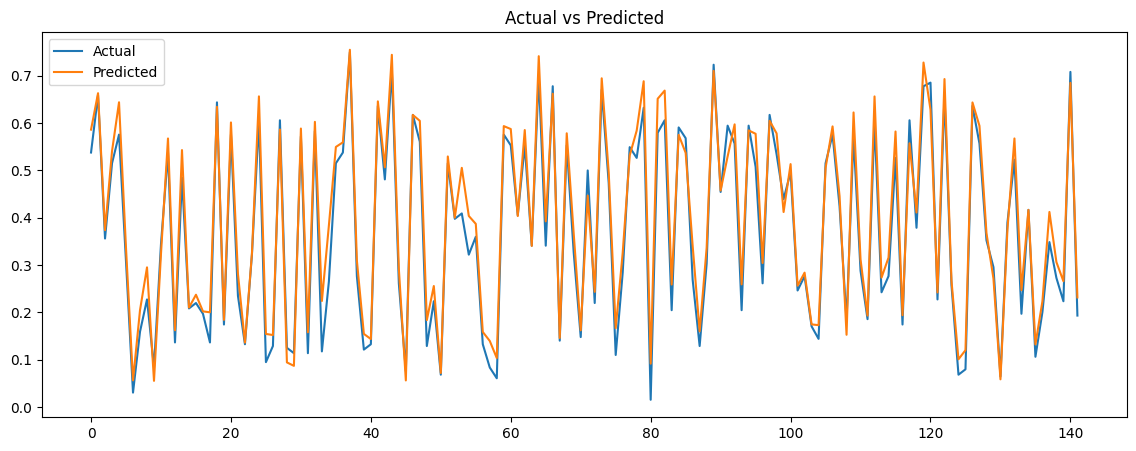

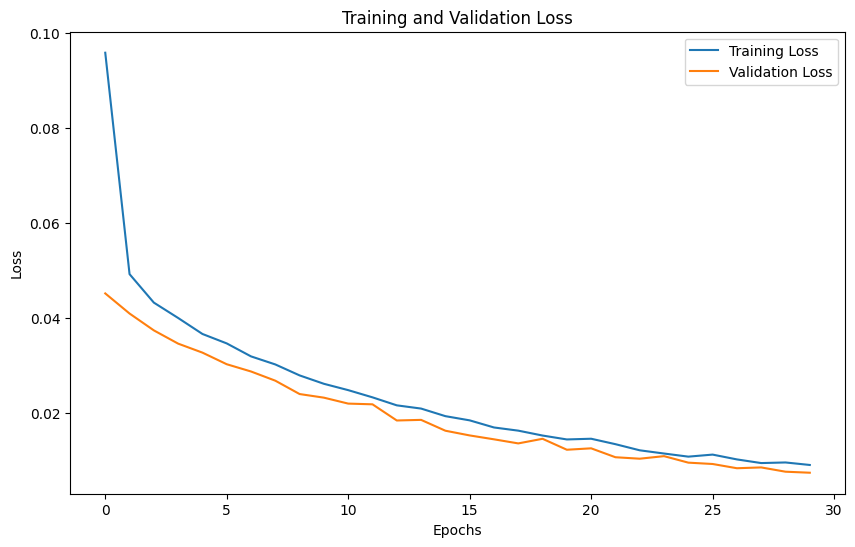

In [ ]:
## 에포크 30
from tensorflow.keras.layers import GRU, Dense, Dropout
TARGET = "Close"
SEQ_SIZE = 30
PRED_SIZE = 1
EPOCH = 30
BATCH_SIZE = 16

def split_xy(dataset, time_steps, y_column):
    x, y = [], []
    for i in range(len(dataset) - time_steps - y_column):
        x_end_number = i + time_steps
        y_end_number = x_end_number + y_column
        x.append(dataset.iloc[i:x_end_number, :].values)
        y.append(dataset.iloc[x_end_number:y_end_number, :][TARGET].values)
    return np.array(x), np.array(y)

X, y = split_xy(data, SEQ_SIZE, PRED_SIZE)
print(X[0], "\n", y[0])
print("X size:", X.shape)
print("y size:", y.shape)

# 시퀀스별로 Min-Max 정규화
scaler = MinMaxScaler()
X_reshaped = X.reshape(-1, X.shape[-1])
X_scaled = scaler.fit_transform(X_reshaped).reshape(X.shape)
y_scaled = scaler.fit_transform(y)

# train, test 분리
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# 초기화 함수 정의
initializer = GlorotNormal()

# 모델 구성
model = Sequential()
model.add(GRU(128, input_shape=(SEQ_SIZE, X_train.shape[2]), return_sequences=True))
model.add(Dropout(0.2))
model.add(GRU(64, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu', kernel_initializer=initializer, kernel_regularizer=regularizers.l2(0.001)))
model.add(Dense(1))
optimizer = Adam(learning_rate=0.001)

model.compile(optimizer=optimizer, loss='mean_squared_error')
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=EPOCH, validation_split=0.2, batch_size=BATCH_SIZE, callbacks=[early_stopping])

# 모델 평가
loss = model.evaluate(X_test, y_test)
print(f'테스트 손실: {loss}')

# 예측
y_pred = model.predict(X_test)

# 성능 평가 지표
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f'MSE: {mse}')
print(f'MAE: {mae}')

# 시각화
plt.figure(figsize=(14, 5))
plt.plot(y_test.flatten(), label='Actual')
plt.plot(y_pred.flatten(), label='Predicted')
plt.legend()
plt.title('Actual vs Predicted')
plt.show()

# 학습 곡선 시각화
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

[[ 3.43500000e+04  3.44500000e+04  3.40500000e+04  3.41000000e+04
   1.02298300e+06 -2.92397661e-03  3.38100000e+04  1.00857734e+00
   3.15625000e+04  1.08039604e+00  2.90975000e+04  1.17192199e+00
   2.69237500e+04  1.26653977e+00  1.00000000e+00]
 [ 3.40500000e+04  3.40500000e+04  3.34000000e+04  3.36500000e+04
   1.66096200e+06 -1.31964809e-02  3.38800000e+04  9.93211334e-01
   3.18225000e+04  1.05742792e+00  2.92233333e+04  1.15147713e+00
   2.70008333e+04  1.24625783e+00  1.00000000e+00]
 [ 3.37500000e+04  3.39500000e+04  3.36000000e+04  3.37000000e+04
   1.03353200e+06  1.48588410e-03  3.38900000e+04  9.94393626e-01
   3.20525000e+04  1.05140005e+00  2.93416667e+04  1.14853735e+00
   2.70804167e+04  1.24444171e+00  1.00000000e+00]
 [ 3.36000000e+04  3.36000000e+04  3.30000000e+04  3.32000000e+04
   1.24095600e+06 -1.48367953e-02  3.37700000e+04  9.83121113e-01
   3.22475000e+04  1.02953717e+00  2.94533333e+04  1.12720688e+00
   2.71558333e+04  1.22257342e+00  1.00000000e+00]
 [ 3

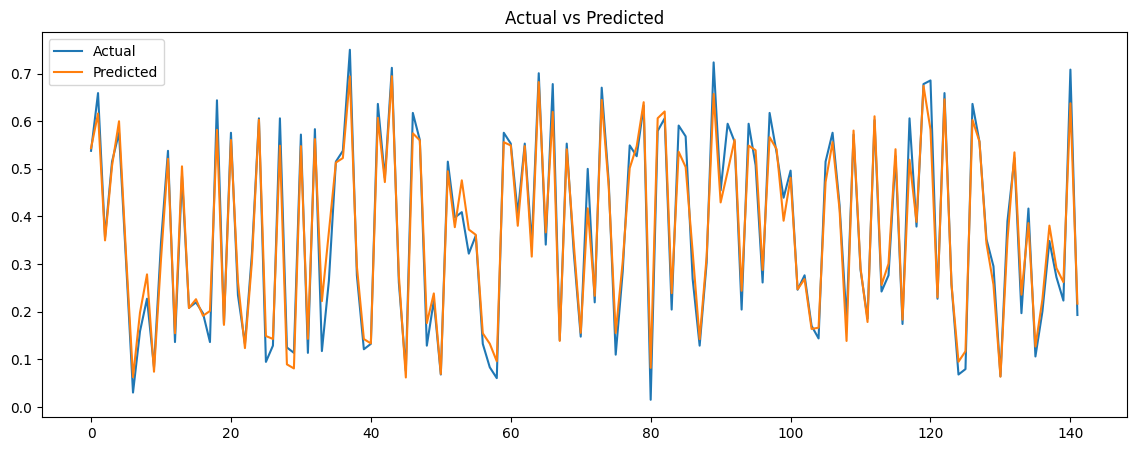

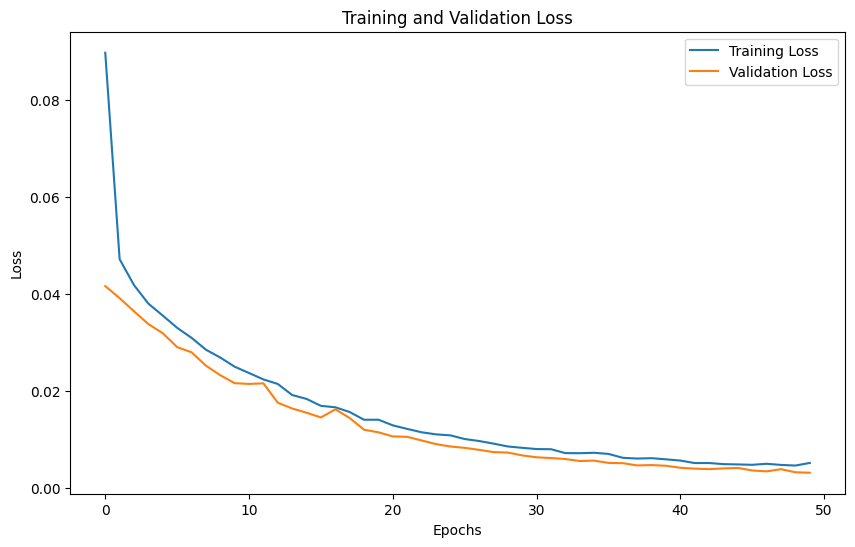

In [ ]:
## 에포크 50
from tensorflow.keras.layers import GRU, Dense, Dropout
TARGET = "Close"
SEQ_SIZE = 30
PRED_SIZE = 1
EPOCH = 50
BATCH_SIZE = 16

def split_xy(dataset, time_steps, y_column):
    x, y = [], []
    for i in range(len(dataset) - time_steps - y_column):
        x_end_number = i + time_steps
        y_end_number = x_end_number + y_column
        x.append(dataset.iloc[i:x_end_number, :].values)
        y.append(dataset.iloc[x_end_number:y_end_number, :][TARGET].values)
    return np.array(x), np.array(y)

X, y = split_xy(data, SEQ_SIZE, PRED_SIZE)
print(X[0], "\n", y[0])
print("X size:", X.shape)
print("y size:", y.shape)

# 시퀀스별로 Min-Max 정규화
scaler = MinMaxScaler()
X_reshaped = X.reshape(-1, X.shape[-1])
X_scaled = scaler.fit_transform(X_reshaped).reshape(X.shape)
y_scaled = scaler.fit_transform(y)

# train, test 분리
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# 초기화 함수 정의
initializer = GlorotNormal()

# 모델 구성
model = Sequential()
model.add(GRU(128, input_shape=(SEQ_SIZE, X_train.shape[2]), return_sequences=True))
model.add(Dropout(0.2))
model.add(GRU(64, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu', kernel_initializer=initializer, kernel_regularizer=regularizers.l2(0.001)))
model.add(Dense(1))
optimizer = Adam(learning_rate=0.001)

model.compile(optimizer=optimizer, loss='mean_squared_error')
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=EPOCH, validation_split=0.2, batch_size=BATCH_SIZE, callbacks=[early_stopping])

# 모델 평가
loss = model.evaluate(X_test, y_test)
print(f'테스트 손실: {loss}')

# 예측
y_pred = model.predict(X_test)

# 성능 평가 지표
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f'MSE: {mse}')
print(f'MAE: {mae}')

# 시각화
plt.figure(figsize=(14, 5))
plt.plot(y_test.flatten(), label='Actual')
plt.plot(y_pred.flatten(), label='Predicted')
plt.legend()
plt.title('Actual vs Predicted')
plt.show()

# 학습 곡선 시각화
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
# 데이터 전처리 확인
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

# 첫 번째 시퀀스와 타겟 값 확인
print(f"First sequence in X_train: \n{X_train[0]}")
print(f"First target in y_train: {y_train[0]}")

# 첫 번째 시퀀스와 타겟 값의 범위 확인 (정규화 확인)
print(f"Min value in first sequence: {np.min(X_train[0])}")
print(f"Max value in first sequence: {np.max(X_train[0])}")
print(f"Min value in first target: {np.min(y_train[0])}")
print(f"Max value in first target: {np.max(y_train[0])}")


X_train shape: (567, 30, 15)
X_test shape: (142, 30, 15)
y_train shape: (567, 1)
y_test shape: (142, 1)
First sequence in X_train: 
[[0.66666667 0.65019011 0.66938776 0.62121212 0.06677503 0.35730964
  0.77304965 0.28807107 0.90033828 0.30837436 0.99798955 0.38838747
  0.96696948 0.4210808  0.6409396 ]
 [0.60606061 0.59315589 0.6122449  0.57954545 0.07775205 0.38416582
  0.7393617  0.252445   0.89617486 0.2558406  0.99638118 0.34674251
  0.97077908 0.38363111 0.66666667]
 [0.56818182 0.57794677 0.6        0.57954545 0.04125408 0.49192656
  0.71453901 0.30772166 0.89123081 0.26054569 0.99447125 0.34794827
  0.9740026  0.381588   0.66666667]
 [0.5719697  0.59315589 0.62857143 0.60227273 0.01734528 0.55158722
  0.69592199 0.41076651 0.88602654 0.29643364 0.99437073 0.3712993
  0.97722611 0.39860277 0.66666667]
 [0.60606061 0.60456274 0.64081633 0.61363636 0.01826182 0.52151469
  0.68173759 0.47400809 0.88212334 0.31567339 0.99537595 0.38230051
  0.98061707 0.40596199 0.66666667]
 [0.59090